<a href="https://colab.research.google.com/github/asia281/dnn2022/blob/main/Asia_of_hw3_transformer_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task overview
In this homework assignment, you will implement a simple Transformer architecture using only basic layers such as nn.Embedding, nn.Linear, ReLU, softmax, and einsum. This will be a decoder-only model (language model), trained on a toy problem. You will analyze the results of the baseline Transformer and results with some minor changes to its components.

# Dataset
The dataset has already been generated for you. It is an artificial and simple dataset that was designed to make training quick and debugging easy. Each example in the dataset consists of a sequence of tokens, with each token represented by a number from 0 to 9. The length of each sequence is 64 tokens. Each and every sequence starts with token 0 (zero).

This is a language modeling task, which means that your model's task is to predict the next token in the sequence. Specifically, for each prefix of the input sequence, your model will generate a prediction for the token that should follow.

The dataset was generated in a particular way, but you don't need to know the details in order to complete the homework assignment. These details are provided in the code that generates the dataset. However, as an overview, we can see some patterns emerging in the following example sequences:

* [0, 1, 0, 1, 0, 1, 0, 1, 2, 3, 4, 2, 3, 4, 2, 3, 7, 8, 6, 7, 8, 6, 9, 4, ...]
  * In this example, 0 seems to always be followed by 1.
* [0, 4, 9, 7, 8, 9, 0, 4, 5, 2, 8, 5, 2, 8, 5, 2, 3, 4, 5, 2, 8, 9, 0, 4, ...]
  * Here, however, 0 is followed by 4.
* [0, 1, 2, 3, 4, 5, 3, 4, 7, 8, 0, 1, 2, 5, 3, 4, 7, 8, 0, 1, 6, 9, 2, 5, ...]
  * In every example we can see that the number N is often followed by N+1.


Each example is constructed with random patterns. In order to accurately predict the next token, your model will need to learn these patterns "on the fly" as it processes each example. This is called "in-context learning," where the model learns how to figure out the pattern instead of learning the pattern during training.

# Model implementation (60% points)
For this homework assignment, you will be implementing a version of the Transformer architecture with only the decoder, also known as a language model. Models from GPT family, like ChatGPT, are similar to what you will be implementing. In fact, ChatGPT even helped improve the readability and quality of writing in this homework assignment. A Transformer is helping to teach Transformers!

You can read the original paper introducing the Transformer for more details: https://arxiv.org/pdf/1706.03762.pdf.

Your model will consist of the following components:

* Learnable, randomly initialized embeddings (using nn.Embedding)
* Positional encoding
* A number of decoding blocks, each consisting of:
  * Multi-head attention (wrapped in a residual connection)
  * Feed-forward layer (wrapped in a residual connection)
* A linear layer to get the output probabilities

The general structure is already provided in the code. You will need to implement the following classes and functions:

* get_positional_encoding
* Attention
* FeedForward
* DecoderBlock

The DecoderModel has already been implemented, but you are welcome to change it if necessary for visualizations, etc. In general, you are free to change any part of the provided code if it makes it easier for you to implement something. 

# Model training (10% points)
The training loop has already been implemented, and it is up to you to decide on the model and learning parameters to use. The default values should be sufficient for achieving the expected accuracy.

Your model should be able to achieve 70% accuracy on the test set, with accuracy defined as the percentage of next tokens predicted correctly given the prefix. This is a token-level accuracy, not a sequence-level accuracy.

After training your model, you should briefly discuss the training and achieved accuracy compared to your expectations. Print and analyze probabilities given by your model - what thing the model learn? How efficient is it?

# Experiments (10% points)
To complete this part of the homework assignment, you will need to test additional models with a different number of DecoderBlocks. Specifically, you should test and report accuracy for 0, 1, 2, 3, maybe 4 DecoderBlocks.

After that, you should train models again with a variable number of blocks, but this time without positional encoding added to the embedding. You should observe that the model requires more layers to achieve the expected accuracy, but it is still able to do so.

# Text generation (20% points)

There are two methods for generating next token probabilities:
* The inefficient method involves running the model with each prefix, predicting the next token, adding it to the prefix, and then running the whole model again. Note that this method may result in a 10% reduction in points.
* The efficient method involves storing (caching) the K and V vectors used in the Attention layer, so that you can pass a single token to get the next one, instead of processing the whole prefix again.

Next, test and compare two sampling methods: argmax (taking, as the next token, the most likely token) and sampling from a distribution returned by the model. Generate a few sentences with those methods. How quickly a model can spot a pattern?

[Alternatively, you can also implement temperature sampling, which allows you to smoothly interpolate between argmax, sampling from a given distribution, and sampling from a uniform distribution.]

# Optional attention visualizations (0% points, but 100% cool)

To better understand how the Transformer model is making its predictions, you can visualize the attention weights in different layers. This will allow you to see which tokens the model is actually paying attention to when making its predictions.

It may be helpful to compare the attention weights in a 1-layer Transformer to those in a 2-layer Transformer to understand why a 1-layer Transformer may not be able to do in-context learning while a 2-layer Transformer can. You can also refer to the following resource for a more in-depth analysis: https://transformer-circuits.pub/2021/framework/index.html .

# Tips and tricks
* It is recommended that you read the original Transformer paper ("Attention is All You Need") at https://arxiv.org/pdf/1706.03762.pdf, as well as the illustrated blog post on the Transformer at http://jalammar.github.io/illustrated-transformer/ .
* All models should train very quickly, especially if you are using a GPU accelerator on colab.research.google.com . Your model should be able to reach 70% accuracy in less than 3 minutes.
* When implementing multi-head attention:
  * It can be helpful to use torch.einsum. You can find examples in the numpy documentation at https://numpy.org/doc/stable/reference/generated/numpy.einsum.html, specifically looking at "Tensor contraction." This can help reduce the number of reshapes, permutations, and transpositions needed for matrix multiplications and make it easier to compute the attention matrix.
  * Use the correct causal mask. Specifically, each "token" should only attend  to itself and previous tokens.
* You can also consider implementing separate (parameterless) functions for split_heads and merge_heads that take a tensor and number of heads as input.
* When implementing positional encoding, you can use "sin" on even dimensions and "cos" on odd dimensions, as described in the original paper. Alternatively, you can generate "sin" and "cos" separately and concatenate them. Both methods work equally well, and concatenation is generally easier to implement. You can refer to the "Illustrated Transformer" blog post for examples of both methods.
* If you are having trouble with any part of the implementation, it can be helpful to check the output of each module separately and the output predictions of your model to identify any issues.
* In the original Transformer paper, the LayerNorm layer is placed on the residual stream, after the Attention or FeedForward layer. However, it may be more effective to place the LayerNorm layer in front of the Attention or FeedForward layer, as this can help stabilize the training process and improve the model's performance. This approach has been used in some subsequent transformer-based models and has been found to be effective. It is possible that the placement of the LayerNorm layer in the original paper was simply a mistake and the code used actually placed the LayerNorm right before the FeedForward/Attention layers, where it should be.

# Simplifications
If you find certain parts of the task to be too difficult, you can try simplifying the task in one of the following ways. Keep in mind that your score may be reduced as a result, but this can help you proceed with the experiments and potentially identify any bugs in your code.

* If you are having trouble training the model, you can try generating a dataset with fewer tokens and a smaller sequence length. This may make it easier to identify and fix any issues with your code or to tune the hyperparameters of the model.
* If you are having difficulty implementing the positional encoding, you could try implementing learnable positional encoding. This involves adding an additional nn.Embedding layer that takes the position of the token (rather than the token itself) as input and returns an embedding for that particular position.
* If you are struggling to implement the multi-head attention, you might try implementing just a single head attention without any splitting and concatenation. This can help you understand the method and make it easier to implement multi-head attention later.
* When implementing Attention, it may be beneficial to skip the implementation of caching at first. You can train and evaluate the accuracy of the model without caching, and then add caching later to improve the efficiency of text generation (and your score).

## Picture below:
Below is a representation of the simplified model that you will be implementing. You may compare it with Figure 1 in the Attention is All You Need paper ( https://arxiv.org/pdf/1706.03762.pdf ).


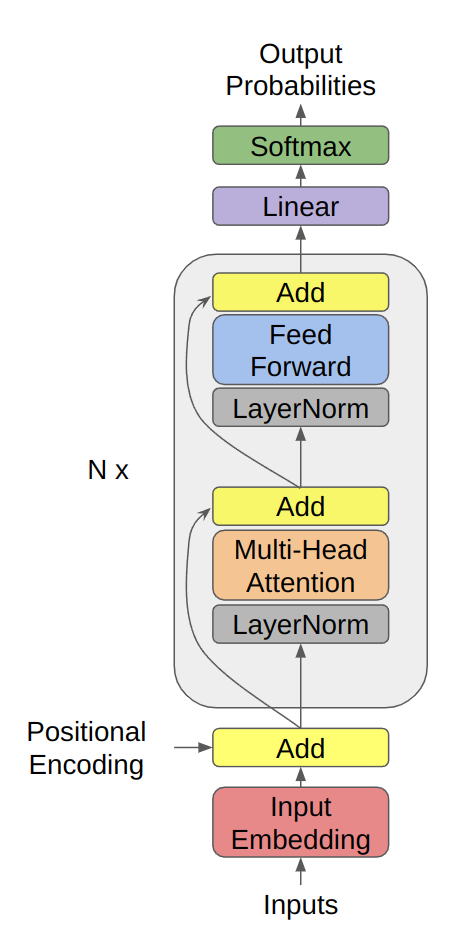

# Tools

In [1]:
# Basic imports
import torch
import numpy as np

from collections import namedtuple

## Dataset generation
The tools below are responsible for generating the dataset. You should not modify them.

### Detailed dataset description
To generate each example, we first create a random Markov chain and sample a sequence of a given length starting at token zero. This Markov chain is specific to the current example.

To create the Markov chain, we follow this algorithm:
1. Generate a random permutation of the numbers P(x) - a bijection that maps each token in the vocabulary to another token.
2. Create a function INC(x) that maps the x-th token to the ((x+1)%N)-th token.
3. For each i-th token (node), create an outgoing edge to P(i) with probability 80% and to INC(i) with probability 20%.

This dataset design ensures that the sequences will be mostly predictable, but not completely. It also introduces learnable concepts that are both dataset-wide (due to the constant INC function) and sample-specific (due to the random P function).

In [2]:
# parameters for dataset generation. If you want to, you can change batch size, but there should be no reason to.
BATCH_SIZE = 128
SEQ_LEN = 64
VOCAB_SIZE = 10

In [3]:
import string

Edge = namedtuple("Edge", "to token prob")

In [4]:
def generate_random(size):
    """
    For generating a random sequence of elements.
    """
    prob = 1.0/size
    graph = {0: [Edge(to=0, token=a, prob=prob) for a in range(size)]}
    return graph

In [5]:
def generate_pseudo_permutation(size, true_prob=1.0):
    assert 0 < size
    assert 0 < true_prob <= 1.0
    permutation = np.random.permutation(size)
    graph = {}
    for v in range(size):
        e1 = Edge(to=(v+1) % size, token=v, prob=1. - true_prob)
        e2 = Edge(to=permutation[v], token=v, prob=true_prob)
        graph[v] = [e1, e2]
    return graph

In [6]:
class SeqGen:
    """
    For generating sequences based on a given Markov chain.
    Markov chain is represented as a directed graph with edges 
    labeled with probabilities and tokens to output
    (dictionary mapping vertex->Edge).
    Assumes that the starting vertex is 0.
    """
    def __init__(self, graph):
        self.graph = graph
        self.current = 0 # we will always start with 0

    def __iter__(self):
        return self

    def __next__(self):
        options = self.graph[self.current]
        probs = list(map(lambda x: x.prob, options))
        choice = np.random.choice(
            list(range(len(options))), size=1, p=probs)[0]
        self.current = options[choice].to
        return options[choice].token

In [7]:
def generate_dataset(gen_factory, seq_len, num_entries):
    """
    For generating datasets with num_entries elements each
    of length seq_len.

      gen_factory is a procedure that returns 
        instance of SeqGen when called.

      seq_len is the length of the sequence to generate.
      
      num_entries is the number of sequences to generate.
    """
    entries = []
    for e in range(num_entries):
        seq_gen = gen_factory()
        seq = []
        for s in range(seq_len + 1):
            seq.append(next(seq_gen))
        entries.append(seq)
    data = torch.tensor(entries, dtype=torch.long)
    x = data[:, :seq_len]
    y = data[:, 1:]       # we predict next token
    return torch.utils.data.TensorDataset(x, y)

In [8]:
def example_generator(gen):
    """
      gen is a procedure that returns a graph describing
      a Markov chain when called.
    """
    def example_gen():
        return SeqGen(gen())
    return example_gen

In [9]:
PERM_EXAMPLE_GENERATOR = example_generator(lambda: generate_pseudo_permutation(
            VOCAB_SIZE, true_prob=0.8))

RANDOM_EXAMPLE_GENERATOR = example_generator(lambda: generate_random(
            VOCAB_SIZE))


TRAIN_DATASET = generate_dataset(
    gen_factory=PERM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=10000)
TEST_DATASET = generate_dataset(
    gen_factory=PERM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=1000)

TRAIN_LOADER = torch.utils.data.DataLoader(
    TRAIN_DATASET, batch_size=BATCH_SIZE)
TEST_LOADER = torch.utils.data.DataLoader(TEST_DATASET, batch_size=BATCH_SIZE)

RANDOM_TRAIN_DATASET = generate_dataset(
    gen_factory=RANDOM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=100)

RANDOM_TEST_DATASET = generate_dataset(
    gen_factory=RANDOM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=100)

RANDOM_TRAIN_LOADER = torch.utils.data.DataLoader(
    RANDOM_TRAIN_DATASET, batch_size=BATCH_SIZE)

RANDOM_TEST_LOADER = torch.utils.data.DataLoader(
    RANDOM_TEST_DATASET, batch_size=BATCH_SIZE)



## Data visualization

In [10]:
for index, x in enumerate(TRAIN_LOADER):
  print(x[0][0])
  if index >= 10:
    break

tensor([0, 9, 1, 7, 3, 4, 5, 0, 1, 7, 3, 4, 5, 0, 9, 1, 7, 3, 4, 5, 0, 9, 1, 7,
        3, 4, 5, 0, 9, 1, 7, 8, 6, 8, 6, 8, 6, 8, 6, 8, 6, 8, 6, 7, 8, 6, 8, 6,
        8, 9, 1, 7, 8, 6, 8, 6, 8, 6, 8, 9, 0, 1, 7, 8])
tensor([0, 1, 2, 9, 6, 5, 0, 8, 1, 2, 9, 6, 5, 0, 8, 1, 7, 3, 4, 2, 9, 6, 5, 6,
        5, 0, 8, 1, 7, 3, 4, 2, 9, 6, 5, 0, 8, 1, 7, 3, 4, 2, 9, 6, 5, 0, 8, 1,
        2, 9, 6, 7, 8, 1, 2, 9, 0, 1, 2, 9, 0, 8, 9, 6])
tensor([0, 2, 1, 8, 4, 6, 7, 7, 7, 8, 4, 6, 5, 0, 2, 1, 2, 1, 8, 9, 3, 9, 3, 9,
        3, 9, 0, 2, 1, 8, 4, 6, 5, 6, 5, 0, 1, 2, 1, 8, 4, 6, 5, 6, 5, 0, 1, 8,
        4, 6, 5, 0, 2, 1, 8, 9, 3, 9, 0, 2, 1, 2, 1, 8])
tensor([0, 9, 4, 6, 7, 0, 9, 0, 9, 4, 6, 5, 1, 8, 3, 2, 7, 0, 9, 4, 5, 6, 7, 0,
        9, 4, 6, 5, 1, 8, 3, 2, 7, 0, 9, 4, 5, 1, 8, 3, 2, 7, 0, 9, 4, 5, 1, 8,
        3, 2, 7, 8, 9, 4, 6, 5, 6, 5, 6, 5, 1, 8, 3, 4])
tensor([0, 4, 5, 6, 1, 2, 3, 9, 0, 4, 5, 6, 1, 8, 7, 8, 7, 8, 7, 0, 4, 5, 2, 3,
        9, 6, 1, 8, 7, 8, 9, 6, 1, 8, 7, 0, 4, 5, 2,

In [11]:
import networkx as nx

def plot_graph(graph):
    """
    Draws the graph that describes a Markov chain.
    """
    edg_list = []
    edg_labels = {}
    for v, out_edg in graph.items():
        for edg in out_edg:
            t = (v, edg.to)
            tr = (edg.to, v)
            text = f"{v}→{edg.to} = {edg.prob:.2f}"
            if t in edg_labels:
                edg_labels[t] += "\n" + text
            elif tr in edg_labels:
                edg_labels[tr] += "\n" + text
            else:
                edg_labels[t] = text
            edg_list.append(t)
    G = nx.DiGraph(directed=True)
    G.add_edges_from(edg_list)
    pos = nx.nx_pydot.graphviz_layout(G)
    fig = plt.figure(1, figsize=(300, 120), dpi=30)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edg_labels, font_size=120)
    nx.draw_networkx(G, pos, node_size=50000, arrows=True, arrowsize=200)
    nx.draw_networkx_labels(G, pos, font_size=120)  

Below you can find some visualizations of the data.

[0, 8, 7, 2, 0, 8, 7, 2, 0, 8, 7, 8, 7, 2, 0, 8, 9, 3, 5, 1, 4, 9, 3, 4, 9, 3, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 2, 0, 8, 7, 2, 0, 8, 9, 3, 5, 1, 4, 9, 3, 5, 1, 4, 9, 3, 4, 9, 3, 4, 5, 1, 4, 9]


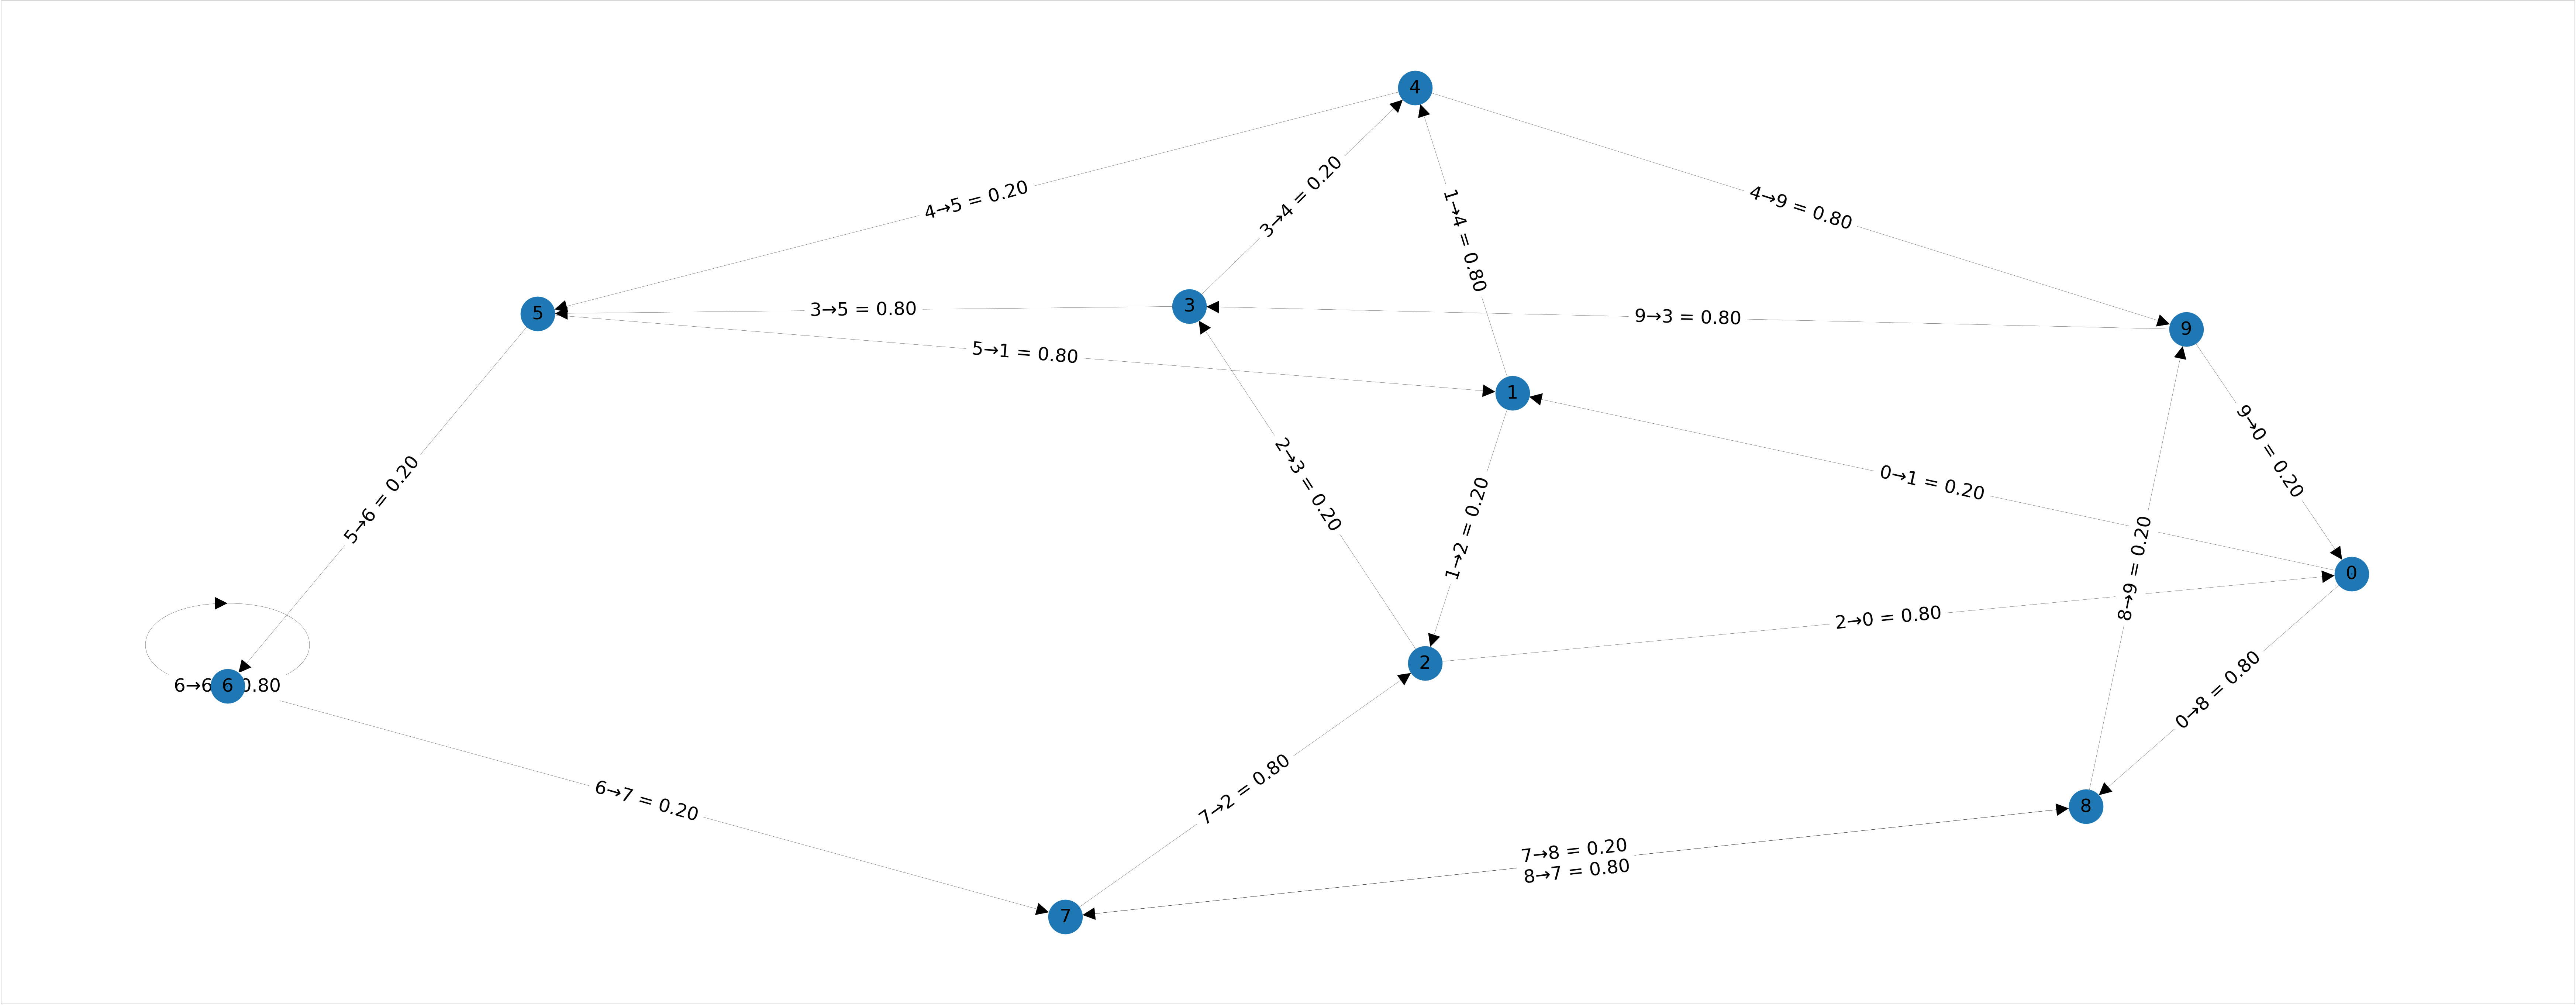

In [12]:
import matplotlib.pyplot as plt

graph = generate_pseudo_permutation(10, true_prob=0.8)
plot_graph(graph)
data = [x for i, x in zip(range(SEQ_LEN), SeqGen(graph))]
print(data)

# Main part

In [13]:
if torch.cuda.is_available():
    DEVICE = torch.device("cuda")
    print("Ok we have cuda capable device")
else:
    DEVICE = torch.device("cpu")
    print("No cuda capable device. If you are running the code in Colab, you can enable a GPU by going to Runtime -> Change runtime type -> GPU.")
    print(" If you are running the code locally, you may need to install additional drivers and libraries, such as cuDNN, to enable GPU support.")


Before implementing the Transformer part of the model, 

*   List item
*   List item

you may (but don't have to) revisit the implementation of the softmax function. This can help you with the efficient implementation of the causal mask later on. 

In [14]:
def stable_softmax(x, dim):
    means = torch.mean(x, dim, keepdim=True)[0]
    x_exp = torch.exp(x-means)
    x_exp_sum = torch.sum(x_exp, dim, keepdim=True)

    return x_exp/x_exp_sum

test_input = torch.arange(128, dtype=torch.float).reshape(2, 4, 16)
assert torch.isclose(stable_softmax(test_input + 10.0**4, dim=-1),
                     stable_softmax(test_input, dim=-1)).all()
assert torch.isclose(stable_softmax(test_input, dim=-1),
                     torch.nn.functional.softmax(test_input, dim=-1)).all()
assert torch.isclose(stable_softmax(test_input, dim=-2),
                     torch.nn.functional.softmax(test_input, dim=-2)).all()
assert torch.isclose(stable_softmax(test_input, dim=0),
                     torch.nn.functional.softmax(test_input, dim=0)).all()

Ok we have cuda capable device


# Task overview

# Model implementation (60% points)
For this homework assignment, you will be implementing a version of the Transformer architecture with only the decoder, also known as a language model. Models from GPT family, like ChatGPT, are similar to what you will be implementing. In fact, ChatGPT even helped improve the readability and quality of writing in this homework assignment. A Transformer is helping to teach Transformers!

You can read the original paper introducing the Transformer for more details: https://arxiv.org/pdf/1706.03762.pdf.

Your model will consist of the following components:

* Learnable, randomly initialized embeddings (using nn.Embedding)
* Positional encoding
* A number of decoding blocks, each consisting of:
  * Multi-head attention (wrapped in a residual connection)
  * Feed-forward layer (wrapped in a residual connection)
* A linear layer to get the output probabilities

The general structure is already provided in the code. You will need to implement the following classes and functions:

* get_positional_encoding
* Attention
* FeedForward
* DecoderBlock

The DecoderModel has already been implemented, but you are welcome to change it if necessary for visualizations, etc. In general, you are free to change any part of the provided code if it makes it easier for you to implement something. 

# Model training (10% points)
The training loop has already been implemented, and it is up to you to decide on the model and learning parameters to use. The default values should be sufficient for achieving the expected accuracy.

Your model should be able to achieve 70% accuracy on the test set, with accuracy defined as the percentage of next tokens predicted correctly given the prefix. This is a token-level accuracy, not a sequence-level accuracy.

After training your model, you should briefly discuss the training and achieved accuracy compared to your expectations. Print and analyze probabilities given by your model - what thing the model learn? How efficient is it?

# Experiments (10% points)
To complete this part of the homework assignment, you will need to test additional models with a different number of DecoderBlocks. Specifically, you should test and report accuracy for 0, 1, 2, 3, maybe 4 DecoderBlocks.

After that, you should train models again with a variable number of blocks, but this time without positional encoding added to the embedding. You should observe that the model requires more layers to achieve the expected accuracy, but it is still able to do so.

# Text generation (20% points)

There are two methods for generating next token probabilities:
* The inefficient method involves running the model with each prefix, predicting the next token, adding it to the prefix, and then running the whole model again. Note that this method may result in a 10% reduction in points.
* The efficient method involves storing (caching) the K and V vectors used in the Attention layer, so that you can pass a single token to get the next one, instead of processing the whole prefix again.

Next, test and compare two sampling methods: argmax (taking, as the next token, the most likely token) and sampling from a distribution returned by the model. Generate a few sentences with those methods. How quickly a model can spot a pattern?


# Optional attention visualizations (0% points, but 100% cool)

To better understand how the Transformer model is making its predictions, you can visualize the attention weights in different layers. This will allow you to see which tokens the model is actually paying attention to when making its predictions.

It may be helpful to compare the attention weights in a 1-layer Transformer to those in a 2-layer Transformer to understand why a 1-layer Transformer may not be able to do in-context learning while a 2-layer Transformer can. You can also refer to the following resource for a more in-depth analysis: https://transformer-circuits.pub/2021/framework/index.html .

## The architecture

Implement a module that performs Multi-Head Attention. For text generation, the module should be able to cache calculated keys and values. The cache should be indifferentiable (don't forget `.detach()`). Remember to use the causal mask to ensure that elements can only see themselves and elements that precede them.

In [129]:
import math

MHACache = namedtuple("MHACache", "k v")
class MultiHeadAttention(torch.nn.Module):
    def __init__(self, d_model, num_heads, d_head):
      super().__init__()
      self.d_model = d_model
      self.num_heads = num_heads
      self.d_head = d_head
      self.d_k = d_model // num_heads
      self.scale = 1 / math.sqrt(self.d_k)
      self.dropout = torch.nn.Dropout(0.1)
      self.softmax = torch.nn.Softmax(dim=1)
      self.query = torch.nn.Linear(d_model, num_heads * self.d_k, bias=True)
      self.key = torch.nn.Linear(d_model, num_heads * self.d_k, bias=True)
      self.value = torch.nn.Linear(d_model, num_heads * self.d_k, bias=True)
    
    def get_empty_cache(self, batch_size):
        return MHACache(k=torch.empty(0, batch_size, self.num_heads, self.d_head, device=DEVICE),
                        v=torch.empty(0, batch_size, self.num_heads, self.d_head, device=DEVICE))
    

    def mask(self, x: torch.Tensor):
        # will mask out tokens from seeing future tokens
        len_q, len_k = x.shape[0], x.shape[1]
        batch_size = x.shape[2]
        mask = torch.tril(torch.ones(len_q, len_k)).to(torch.bool).unsqueeze(-1).repeat(1, 1, batch_size).to(DEVICE) # subsequent_mask(len(x)).to(x.device)
        
        # (len_q, len_k, batch_size, 1 -- broadcasted to num_heads)
        return mask.unsqueeze(-1)

    def split_shape(self, x):
        # (seq, batch, num_head, d_head)
        return x.reshape(x.shape[0], x.shape[1], self.num_heads, self.d_head)

    def forward(self, x, cache, use_cache=False): # seq = 64 in our case
      """
        x input of shape (seq, batch_size, d_model).

        cache is a MHACache object consisting of keys and values
          of shape (seq', batch_size, head, d_head) seq' is a number of curr layer

      Returns the result of the attention computation along with the updated
      cache. The attention is calculated separately for each head. The attention
      mechanism used is decoder-style, which means that an element can only
      attend to itself and elements that precede it (including elements in the
      cache). The new cache is created by extending the old cache with the new
      keys and values computed for each head of x. num_head * d_head == d_model
      """
      assert len(x.shape) == 3  # seq, batch, d_model
      assert x.shape[-1] == self.d_model

      assert len(cache.k.shape) == 4  # seq', batch, num_head, d_head
      assert cache.k.shape == cache.v.shape
      assert cache.k.shape[1] == x.shape[1]
      assert cache.k.shape[2] == self.num_heads
      assert cache.k.shape[3] == self.d_head

      q = self.split_shape(self.query(x)) * self.scale # 1, batch, num_head, d_head
      if not use_cache:
        k = self.split_shape(self.key(x))
        v = self.split_shape(self.value(x))
      else:
        k = self.split_shape(self.key(x[-1, :, :])) # take only the last element
        v = self.split_shape(self.value(x[-1, :, :]))
        k = torch.cat((cache.k, k)) # seq'+seq, batch, num_head, d_head
        v = torch.cat((cache.v, v)) # seq'+seq, batch, num_head, d_head
      
      # seq, seq'+seq, batch_size, num_heads
      scores = torch.einsum('ibhd,jbhd->ijbh', q, k) 
      mask = self.mask(scores)
      scores = scores.masked_fill(mask == 0, -1.0e9)

      attention = self.softmax(scores)
      attention = self.dropout(attention)
      res = torch.einsum("ijbh,jbhd->ibhd", attention, v)
      res = res.reshape(x.shape[0], x.shape[1], self.d_model)
      new_cache = MHACache(k = k.detach(), v = v.detach())
      assert res.shape == x.shape
      return res, new_cache

Implement a FeedForward layer (pay attention to the place where the activation function is used).

In [102]:
class FeedForward(torch.nn.Module):
    def __init__(self, d_model, d_ff):
      super().__init__()
      self.d_model = d_model
      self.d_ff = d_ff
      self.lin1 = torch.nn.Linear(d_model, d_ff)
      self.lin2 = torch.nn.Linear(d_ff, d_model)
      self.act = torch.nn.ReLU()
      self.do = torch.nn.Dropout(0.1)

    def forward(self, x):
      assert len(x.shape) == 3  # seq, batch, d_model
      assert x.shape[-1] == self.d_model
      
      # lin -> act -> dropout -> lin
      x = self.act(self.lin1(x))
      x = self.lin2(self.do(x))

      assert len(x.shape) == 3  # seq, batch, d_model
      assert x.shape[-1] == self.d_model
      return x



Implement `DecoderLayer`: 
* use residual connections as in the image
* use `torch.nn.LayerNorm(d_model)`
* use `MultiHeadAttention` and `FeedForward` that you have implemented above

In [103]:
class DecoderLayer(torch.nn.Module):
    def __init__(self, d_model, d_ff, num_heads, d_head):
      super().__init__()
      self.attention = MultiHeadAttention(d_model, num_heads, d_head)
      self.feedforward = FeedForward(d_model, d_ff)
      self.layernorm1 = torch.nn.LayerNorm(d_model)
      self.layernorm2 = torch.nn.LayerNorm(d_model)

    def get_empty_cache(self, batch_size):
        return self.attention.get_empty_cache(batch_size)

    def forward(self, x, cache):
      x_copy = x.detach().clone()
      x_att, new_cache = self.attention(self.layernorm1(x), cache)
      x = x_copy + x_att  # Sum
      x_copy = x.detach().clone()
      x = x_copy + self.feedforward(self.layernorm2(x)) # Sum

      return x, new_cache

Implement positional encoding.

In [104]:
import math 

def get_positional_encoding(seqlen, hiddendim):
  """
  Returns a matrix P of shape (seqlen, hiddendim) where
  P[i] should be added to the ith element of the input sequence 
  as positional encoding.
  """
  # TODO: implement positional encoding
  positional_encoding = torch.zeros((seqlen, hiddendim))
  scalar = 10000
  for k in range(seqlen):
    for i in range(int(hiddendim/2)):
      denom = np.power(scalar, 2*i/hiddendim)
      positional_encoding[k, 2*i] = math.sin(k / denom)
      positional_encoding[k, 2*i+1] = math.cos(k / denom)

  # output shape: (seqlen, hiddendim)
  return torch.tensor(positional_encoding, dtype=torch.float,
                      device=DEVICE)

Decoder is already implemented below.

In [106]:
class Decoder(torch.nn.Module):
    def __init__(self, vocab_size, d_model, d_ff, num_heads, d_head, num_layers):
        super().__init__()
        self.vocab_size = vocab_size
        self.d_model = d_model
        self.embedding = torch.nn.Embedding(vocab_size, d_model)
        self.dec_layers = torch.nn.ModuleList([
            DecoderLayer(d_model=d_model, d_ff=d_ff, num_heads=num_heads, d_head=d_head) for i in range(num_layers)
        ])
        self.output_layer = torch.nn.Linear(d_model, vocab_size, bias=True)

    def get_empty_cache(self, batch_size):
        return [
            l.get_empty_cache(batch_size) for l in self.dec_layers
        ]

    def forward(self, x, cache, offset=0):
        assert len(x.shape) == 2  # seq, batch
        assert (x < self.vocab_size).all()
        assert len(self.dec_layers) == len(cache)

        x = self.embedding(x)
        if POSITIONAL:
          x = x + get_positional_encoding(x.shape[0]+offset, self.d_model)[offset:, None, :]

        new_cache = []
        for l, c in zip(self.dec_layers, cache):
            x, nc = l(x, c)
            new_cache.append(nc)

        x = self.output_layer(x)
        
        return torch.distributions.Categorical(logits=x), new_cache


## Training and evaluation

Eval is already implemented, please note that the model expects the input of shape `(seq_len, batch)`.

In [107]:
def take_most_probable(dist):
    return torch.argmax(dist.logits.detach(), dim=-1)

def take_sample(dist):
  return dist.sample()

def eval(model, test_loader):
    model.eval()
    ti = iter(test_loader)

    total = 0
    total_correct = 0
    for td in ti:
        x, y = td
        x = x.to(DEVICE).swapdims(0, 1)
        y = y.to(DEVICE).swapdims(0, 1)
        dist, cache = model(x, model.get_empty_cache(x.shape[1]))

        model_ans = take_most_probable(dist)
        assert model_ans.shape == y.shape
        total_correct += (model_ans == y).sum().cpu().item()
        total += np.prod(y.shape)

    return total_correct/total

In [108]:
def train(model, train_loader, test_loader, num_epoches, pos):
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)
    for epoch in range(num_epoches):
        model.train()
        ti = iter(train_loader)
        epoch_total_loss = 0.0
        num_iters = 0
        for td in ti:
            x, y = td
            x = x.to(DEVICE).swapdims(0, 1)
            y = y.to(DEVICE).swapdims(0, 1)
            optimizer.zero_grad()
            dist, cache = model(x, model.get_empty_cache(x.shape[1]), pos)

            loss = -dist.log_prob(y).mean()
            loss.backward()
            optimizer.step()

            num_iters += 1
            epoch_total_loss += loss.detach().cpu().item()

        acc = eval(model, test_loader)
        epoch_avg_loss = epoch_total_loss / num_iters
        print(f"EPOCH {epoch} loss:{epoch_avg_loss} acc:{acc:.4f}")




```
# This is formatted as code
```
## First model
Train the model on the dataset.

In [45]:
BATCH_SIZE = 128
HIDDEN_DIM = 64
HIDDEN_FF = HIDDEN_DIM * 4
NUM_HEADS = 4
HEAD_DIM = HIDDEN_DIM // NUM_HEADS
NUM_LAYERS = 4
LR = 0.001
POSITIONAL = True

model = Decoder(vocab_size=VOCAB_SIZE, 
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS)

model.to(DEVICE)
train(model, TRAIN_LOADER, TEST_LOADER, 50, 0)

<ipython-input-18-fee9b59fdfa1>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(positional_encoding, dtype=torch.float,


EPOCH 0 loss:2.2526863979387888 acc:0.2613
EPOCH 1 loss:2.1952535472338712 acc:0.2735
EPOCH 2 loss:2.2018033492414255 acc:0.2788
EPOCH 3 loss:2.2124892941004113 acc:0.2792
EPOCH 4 loss:2.1917283987697167 acc:0.2761
EPOCH 5 loss:2.187474093859709 acc:0.2796
EPOCH 6 loss:2.172388770912267 acc:0.3021
EPOCH 7 loss:2.120661563511136 acc:0.3201
EPOCH 8 loss:2.079302805888502 acc:0.3220
EPOCH 9 loss:2.047554145885419 acc:0.3292
EPOCH 10 loss:2.0329245132736014 acc:0.3408
EPOCH 11 loss:1.9992955455297157 acc:0.3518
EPOCH 12 loss:1.961998596976075 acc:0.3722
EPOCH 13 loss:1.901922548873515 acc:0.4069
EPOCH 14 loss:1.827477047715006 acc:0.4472
EPOCH 15 loss:1.745499645607381 acc:0.4822
EPOCH 16 loss:1.6386367912533917 acc:0.5368
EPOCH 17 loss:1.5186612349522264 acc:0.5821
EPOCH 18 loss:1.4067956858043429 acc:0.6218
EPOCH 19 loss:1.3017074020603034 acc:0.6553
EPOCH 20 loss:1.193035373204871 acc:0.6750
EPOCH 21 loss:1.1257384306267848 acc:0.6813
EPOCH 22 loss:1.0999571537669701 acc:0.6865
EPOCH 23

We see that around epoch 25 we achieved 0.7 accuracy and this accuracy slightly increase up to 50th epoch.

Make sure your model is not cheating (that is an element cannot attend to the next element). To do this check that accuracy on the random dataset is around 10% .

In [24]:
model_test = Decoder(vocab_size=VOCAB_SIZE, 
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS)

model_test.to(DEVICE)
train(model_test, RANDOM_TRAIN_LOADER, RANDOM_TEST_LOADER, 201, 0)

EPOCH 0 loss:2.6480352878570557 acc:0.1041


<ipython-input-18-fee9b59fdfa1>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(positional_encoding, dtype=torch.float,


EPOCH 1 loss:2.5350568294525146 acc:0.1027
EPOCH 2 loss:2.486064910888672 acc:0.1025
EPOCH 3 loss:2.4750850200653076 acc:0.1009
EPOCH 4 loss:2.4749858379364014 acc:0.0980
EPOCH 5 loss:2.468912363052368 acc:0.0994
EPOCH 6 loss:2.457759380340576 acc:0.1011
EPOCH 7 loss:2.4366533756256104 acc:0.0995
EPOCH 8 loss:2.426560401916504 acc:0.0955
EPOCH 9 loss:2.4160146713256836 acc:0.0938
EPOCH 10 loss:2.4139721393585205 acc:0.0952
EPOCH 11 loss:2.41288161277771 acc:0.0959
EPOCH 12 loss:2.409379720687866 acc:0.0948
EPOCH 13 loss:2.405961751937866 acc:0.0998
EPOCH 14 loss:2.39747953414917 acc:0.1005
EPOCH 15 loss:2.385441780090332 acc:0.1006
EPOCH 16 loss:2.378077745437622 acc:0.0998
EPOCH 17 loss:2.371509313583374 acc:0.1006
EPOCH 18 loss:2.3696277141571045 acc:0.0997
EPOCH 19 loss:2.368055820465088 acc:0.0980
EPOCH 20 loss:2.370774984359741 acc:0.0961
EPOCH 21 loss:2.372222661972046 acc:0.0972
EPOCH 22 loss:2.3695452213287354 acc:0.0964
EPOCH 23 loss:2.369563102722168 acc:0.0950
EPOCH 24 loss:

We can be sure that the model is not cheating, no matter how many epochs we are training, accuracy is around 0.1.

In [37]:
# Function for plotting the list
def plot_list(l, xlabel: str, ylabel: str):
  xs = range(0, len(l))
  plt.clf()
  plt.plot(xs, l)
  plt.ylabel(xlabel)
  plt.xlabel(ylabel)
  plt.grid()
  plt.show()

In [26]:
# Function for plotting a set of list
def plot_many_lists(lists, xlabel: str, ylabel: str):
  xs = range(1, len(lists[0]) + 1)
  plt.clf()
  for i, l in enumerate(lists):
    plt.plot(xs, l, label=f"prefix {i}")
  plt.ylabel(xlabel)
  plt.xlabel(ylabel)
  plt.grid()
  plt.legend()
  plt.show()

Choose a prefix of an arbitrary sequence from the test set (you can also write your sequence, just remember that every sequence starts with token 0). For each position in this sequence print the probability distribution over the next token according to the model. Analyze the results.

In [35]:
def most_probable_from_list(l):
  max_value = max(l)
  max_index = l.index(max_value)
  return (max_index, max_value)

<ipython-input-104-fee9b59fdfa1>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(positional_encoding, dtype=torch.float,


For the position 0
original digit is: tensor([3], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 9.13E-02
Digit: 1, Probability: 3.23E-01
Digit: 2, Probability: 7.53E-02
Digit: 3, Probability: 7.02E-02
Digit: 4, Probability: 5.19E-02
Digit: 5, Probability: 7.62E-02
Digit: 6, Probability: 9.43E-02
Digit: 7, Probability: 5.81E-02
Digit: 8, Probability: 8.08E-02
Digit: 9, Probability: 7.84E-02


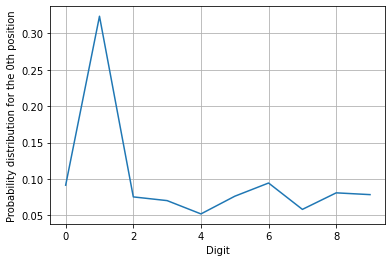

For the position 1
original digit is: tensor([7], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 6.97E-02
Digit: 1, Probability: 8.14E-02
Digit: 2, Probability: 6.03E-02
Digit: 3, Probability: 1.66E-02
Digit: 4, Probability: 3.37E-01
Digit: 5, Probability: 8.81E-02
Digit: 6, Probability: 1.11E-01
Digit: 7, Probability: 8.28E-02
Digit: 8, Probability: 9.42E-02
Digit: 9, Probability: 5.80E-02


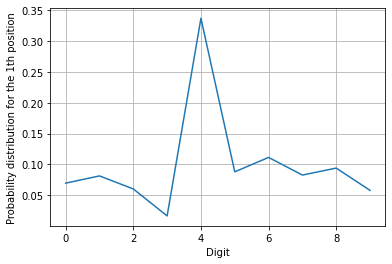

For the position 2
original digit is: tensor([9], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 8.65E-02
Digit: 1, Probability: 5.46E-02
Digit: 2, Probability: 7.87E-02
Digit: 3, Probability: 3.38E-02
Digit: 4, Probability: 9.52E-02
Digit: 5, Probability: 5.53E-02
Digit: 6, Probability: 1.15E-01
Digit: 7, Probability: 2.98E-02
Digit: 8, Probability: 4.00E-01
Digit: 9, Probability: 5.09E-02


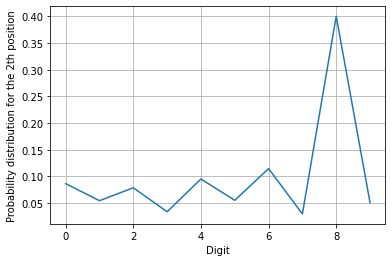

For the position 3
original digit is: tensor([0], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 2.71E-01
Digit: 1, Probability: 7.57E-02
Digit: 2, Probability: 8.01E-02
Digit: 3, Probability: 7.75E-02
Digit: 4, Probability: 1.19E-01
Digit: 5, Probability: 6.92E-02
Digit: 6, Probability: 6.16E-02
Digit: 7, Probability: 4.85E-02
Digit: 8, Probability: 1.78E-01
Digit: 9, Probability: 1.92E-02


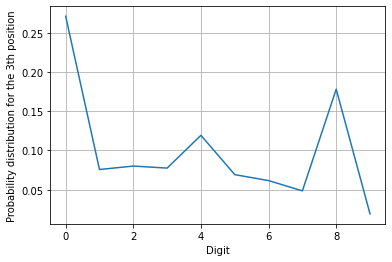

For the position 4
original digit is: tensor([3], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 7.68E-04
Digit: 1, Probability: 1.67E-01
Digit: 2, Probability: 8.67E-04
Digit: 3, Probability: 8.29E-01
Digit: 4, Probability: 9.56E-04
Digit: 5, Probability: 1.99E-06
Digit: 6, Probability: 1.84E-04
Digit: 7, Probability: 1.20E-05
Digit: 8, Probability: 1.46E-04
Digit: 9, Probability: 2.01E-04


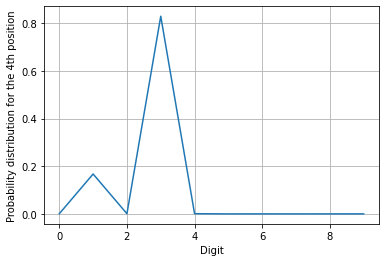

For the position 5
original digit is: tensor([7], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 1.57E-04
Digit: 1, Probability: 2.65E-04
Digit: 2, Probability: 2.42E-04
Digit: 3, Probability: 5.46E-05
Digit: 4, Probability: 1.79E-01
Digit: 5, Probability: 1.19E-03
Digit: 6, Probability: 1.42E-04
Digit: 7, Probability: 8.19E-01
Digit: 8, Probability: 1.82E-04
Digit: 9, Probability: 3.41E-05


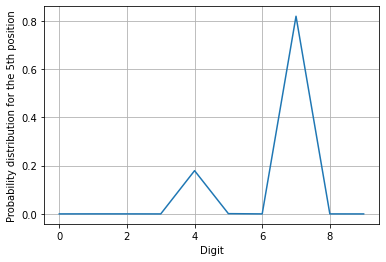

For the position 6
original digit is: tensor([8], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 1.12E-03
Digit: 1, Probability: 9.63E-04
Digit: 2, Probability: 2.87E-03
Digit: 3, Probability: 3.20E-04
Digit: 4, Probability: 1.77E-04
Digit: 5, Probability: 5.47E-03
Digit: 6, Probability: 1.54E-03
Digit: 7, Probability: 9.53E-04
Digit: 8, Probability: 2.26E-01
Digit: 9, Probability: 7.60E-01


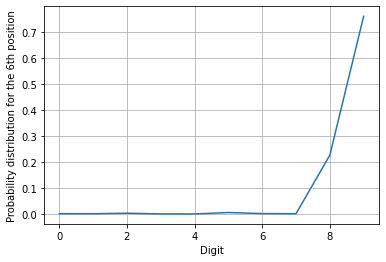

For the position 7
original digit is: tensor([9], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 7.73E-02
Digit: 1, Probability: 7.84E-02
Digit: 2, Probability: 8.48E-02
Digit: 3, Probability: 7.30E-02
Digit: 4, Probability: 7.29E-02
Digit: 5, Probability: 8.67E-02
Digit: 6, Probability: 7.17E-02
Digit: 7, Probability: 4.40E-02
Digit: 8, Probability: 1.68E-01
Digit: 9, Probability: 2.43E-01


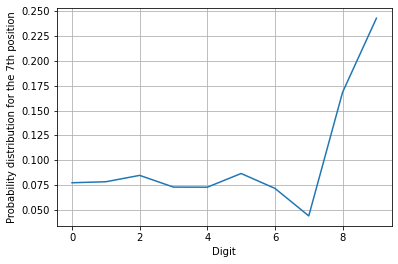

For the position 8
original digit is: tensor([4], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 5.92E-01
Digit: 1, Probability: 4.86E-02
Digit: 2, Probability: 3.62E-02
Digit: 3, Probability: 3.46E-02
Digit: 4, Probability: 7.03E-02
Digit: 5, Probability: 6.77E-02
Digit: 6, Probability: 7.03E-02
Digit: 7, Probability: 4.29E-02
Digit: 8, Probability: 2.64E-02
Digit: 9, Probability: 1.06E-02


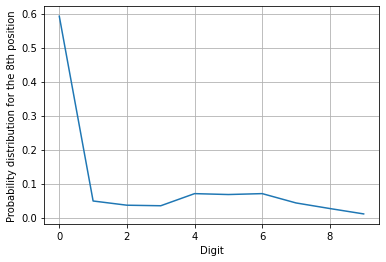

For the position 9
original digit is: tensor([6], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 7.81E-02
Digit: 1, Probability: 1.35E-01
Digit: 2, Probability: 6.97E-02
Digit: 3, Probability: 4.68E-02
Digit: 4, Probability: 2.53E-02
Digit: 5, Probability: 3.33E-01
Digit: 6, Probability: 8.92E-02
Digit: 7, Probability: 9.78E-02
Digit: 8, Probability: 8.56E-02
Digit: 9, Probability: 4.03E-02


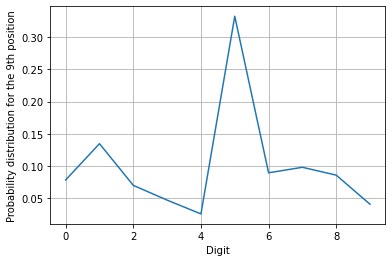

For the position 10
original digit is: tensor([7], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 8.90E-02
Digit: 1, Probability: 7.14E-02
Digit: 2, Probability: 9.26E-02
Digit: 3, Probability: 4.41E-02
Digit: 4, Probability: 3.36E-02
Digit: 5, Probability: 9.50E-02
Digit: 6, Probability: 4.73E-02
Digit: 7, Probability: 3.29E-01
Digit: 8, Probability: 9.06E-02
Digit: 9, Probability: 1.08E-01


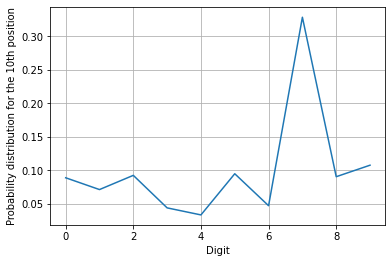

For the position 11
original digit is: tensor([9], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 1.22E-03
Digit: 1, Probability: 8.53E-04
Digit: 2, Probability: 3.13E-03
Digit: 3, Probability: 5.11E-04
Digit: 4, Probability: 1.61E-04
Digit: 5, Probability: 2.27E-03
Digit: 6, Probability: 8.69E-04
Digit: 7, Probability: 3.65E-04
Digit: 8, Probability: 1.86E-01
Digit: 9, Probability: 8.04E-01


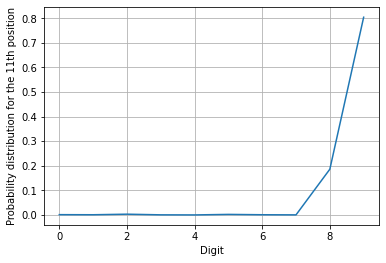

For the position 12
original digit is: tensor([4], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 1.49E-01
Digit: 1, Probability: 1.89E-03
Digit: 2, Probability: 6.50E-04
Digit: 3, Probability: 2.19E-03
Digit: 4, Probability: 8.45E-01
Digit: 5, Probability: 1.91E-04
Digit: 6, Probability: 7.36E-04
Digit: 7, Probability: 2.64E-05
Digit: 8, Probability: 1.46E-05
Digit: 9, Probability: 3.03E-05


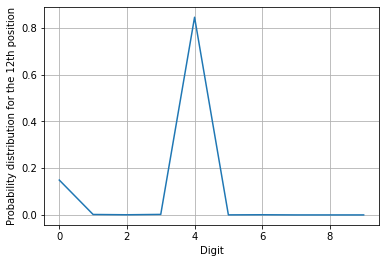

For the position 13
original digit is: tensor([6], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 3.74E-04
Digit: 1, Probability: 2.16E-03
Digit: 2, Probability: 2.68E-04
Digit: 3, Probability: 1.39E-04
Digit: 4, Probability: 2.06E-04
Digit: 5, Probability: 3.01E-01
Digit: 6, Probability: 6.94E-01
Digit: 7, Probability: 1.47E-03
Digit: 8, Probability: 1.02E-04
Digit: 9, Probability: 3.28E-04


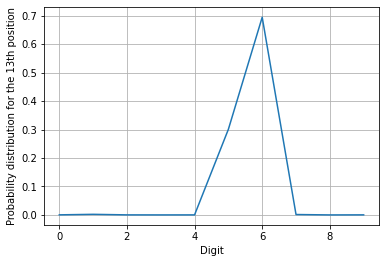

For the position 14
original digit is: tensor([0], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 6.88E-02
Digit: 1, Probability: 3.83E-02
Digit: 2, Probability: 6.03E-02
Digit: 3, Probability: 4.12E-02
Digit: 4, Probability: 3.09E-02
Digit: 5, Probability: 6.89E-02
Digit: 6, Probability: 1.16E-02
Digit: 7, Probability: 5.70E-01
Digit: 8, Probability: 3.82E-02
Digit: 9, Probability: 7.16E-02


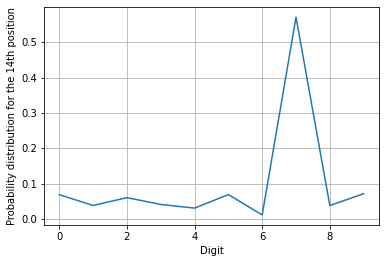

For the position 15
original digit is: tensor([3], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 3.30E-04
Digit: 1, Probability: 1.47E-01
Digit: 2, Probability: 4.84E-04
Digit: 3, Probability: 8.51E-01
Digit: 4, Probability: 5.03E-04
Digit: 5, Probability: 4.31E-07
Digit: 6, Probability: 1.28E-05
Digit: 7, Probability: 1.22E-05
Digit: 8, Probability: 2.55E-04
Digit: 9, Probability: 1.32E-04


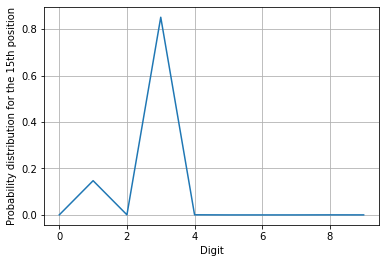

For the position 16
original digit is: tensor([7], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 1.03E-04
Digit: 1, Probability: 2.40E-04
Digit: 2, Probability: 2.60E-05
Digit: 3, Probability: 3.97E-05
Digit: 4, Probability: 1.44E-01
Digit: 5, Probability: 6.51E-04
Digit: 6, Probability: 2.30E-05
Digit: 7, Probability: 8.54E-01
Digit: 8, Probability: 1.21E-04
Digit: 9, Probability: 1.47E-05


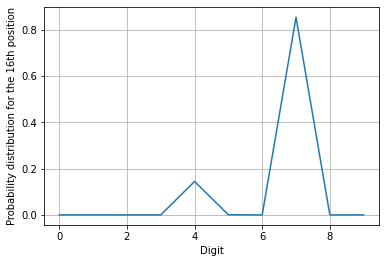

For the position 17
original digit is: tensor([9], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 2.94E-04
Digit: 1, Probability: 3.60E-04
Digit: 2, Probability: 9.70E-04
Digit: 3, Probability: 3.54E-04
Digit: 4, Probability: 7.06E-05
Digit: 5, Probability: 1.29E-03
Digit: 6, Probability: 5.04E-04
Digit: 7, Probability: 2.23E-04
Digit: 8, Probability: 1.92E-01
Digit: 9, Probability: 8.04E-01


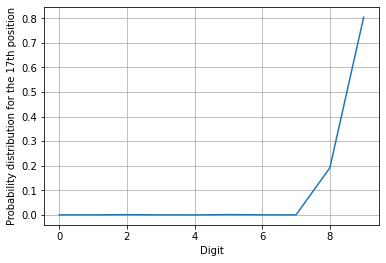

For the position 18
original digit is: tensor([0], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 1.54E-01
Digit: 1, Probability: 1.60E-03
Digit: 2, Probability: 5.44E-04
Digit: 3, Probability: 2.26E-03
Digit: 4, Probability: 8.41E-01
Digit: 5, Probability: 1.97E-04
Digit: 6, Probability: 6.14E-04
Digit: 7, Probability: 3.00E-05
Digit: 8, Probability: 1.06E-05
Digit: 9, Probability: 1.68E-05


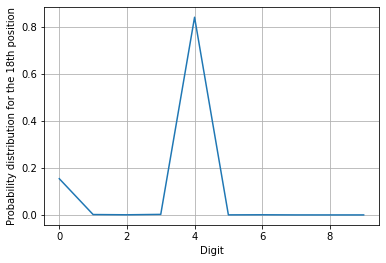

For the position 19
original digit is: tensor([1], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 3.61E-04
Digit: 1, Probability: 1.46E-01
Digit: 2, Probability: 6.57E-04
Digit: 3, Probability: 8.52E-01
Digit: 4, Probability: 4.42E-04
Digit: 5, Probability: 1.62E-06
Digit: 6, Probability: 6.26E-05
Digit: 7, Probability: 7.47E-06
Digit: 8, Probability: 1.06E-04
Digit: 9, Probability: 9.93E-05


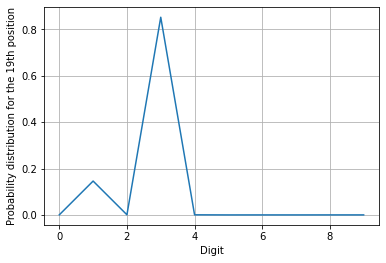

For the position 20
original digit is: tensor([2], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 2.07E-02
Digit: 1, Probability: 2.98E-01
Digit: 2, Probability: 3.42E-01
Digit: 3, Probability: 3.78E-02
Digit: 4, Probability: 5.22E-02
Digit: 5, Probability: 4.94E-02
Digit: 6, Probability: 6.47E-02
Digit: 7, Probability: 3.80E-02
Digit: 8, Probability: 6.71E-02
Digit: 9, Probability: 3.01E-02


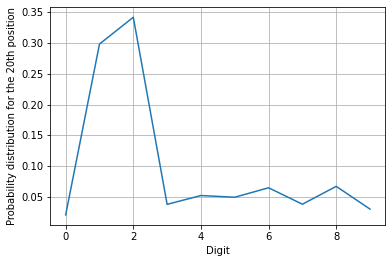

For the position 21
original digit is: tensor([8], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 3.32E-02
Digit: 1, Probability: 9.35E-03
Digit: 2, Probability: 2.86E-01
Digit: 3, Probability: 3.56E-01
Digit: 4, Probability: 4.87E-02
Digit: 5, Probability: 5.74E-02
Digit: 6, Probability: 5.27E-02
Digit: 7, Probability: 3.37E-02
Digit: 8, Probability: 8.17E-02
Digit: 9, Probability: 4.12E-02


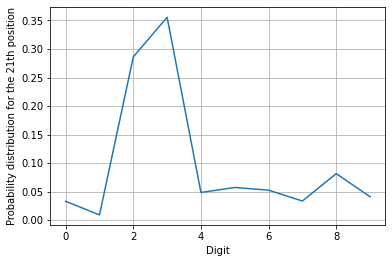

For the position 22
original digit is: tensor([1], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 4.22E-02
Digit: 1, Probability: 4.38E-02
Digit: 2, Probability: 2.65E-02
Digit: 3, Probability: 5.71E-02
Digit: 4, Probability: 4.23E-02
Digit: 5, Probability: 9.93E-02
Digit: 6, Probability: 2.69E-02
Digit: 7, Probability: 1.52E-02
Digit: 8, Probability: 8.94E-02
Digit: 9, Probability: 5.57E-01


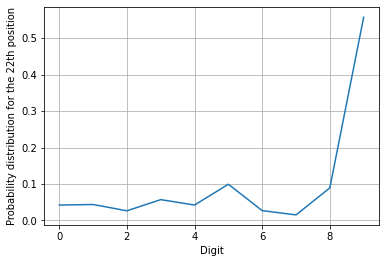

For the position 23
original digit is: tensor([2], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 2.90E-02
Digit: 1, Probability: 1.05E-02
Digit: 2, Probability: 7.62E-01
Digit: 3, Probability: 4.05E-02
Digit: 4, Probability: 3.25E-02
Digit: 5, Probability: 5.04E-02
Digit: 6, Probability: 1.60E-02
Digit: 7, Probability: 1.73E-02
Digit: 8, Probability: 2.77E-02
Digit: 9, Probability: 1.38E-02


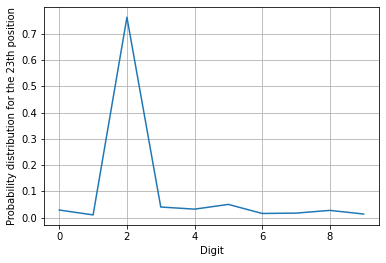

For the position 24
original digit is: tensor([3], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 9.56E-05
Digit: 1, Probability: 3.13E-04
Digit: 2, Probability: 1.60E-04
Digit: 3, Probability: 3.07E-01
Digit: 4, Probability: 3.05E-04
Digit: 5, Probability: 4.21E-04
Digit: 6, Probability: 2.27E-05
Digit: 7, Probability: 5.86E-04
Digit: 8, Probability: 6.91E-01
Digit: 9, Probability: 2.23E-04


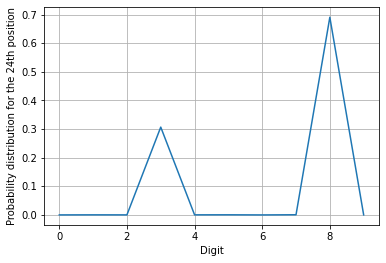

For the position 25
original digit is: tensor([4], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 1.52E-03
Digit: 1, Probability: 3.98E-04
Digit: 2, Probability: 5.91E-05
Digit: 3, Probability: 2.00E-04
Digit: 4, Probability: 1.59E-01
Digit: 5, Probability: 6.13E-04
Digit: 6, Probability: 3.62E-05
Digit: 7, Probability: 8.38E-01
Digit: 8, Probability: 1.41E-04
Digit: 9, Probability: 1.59E-04


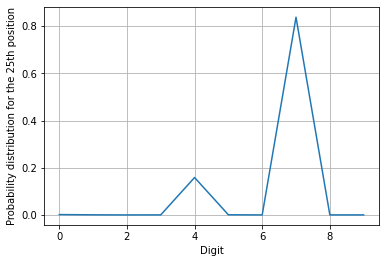

For the position 26
original digit is: tensor([6], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 1.14E-03
Digit: 1, Probability: 4.98E-04
Digit: 2, Probability: 1.10E-03
Digit: 3, Probability: 2.14E-04
Digit: 4, Probability: 2.66E-04
Digit: 5, Probability: 2.03E-01
Digit: 6, Probability: 7.87E-01
Digit: 7, Probability: 1.56E-03
Digit: 8, Probability: 1.75E-04
Digit: 9, Probability: 4.76E-03


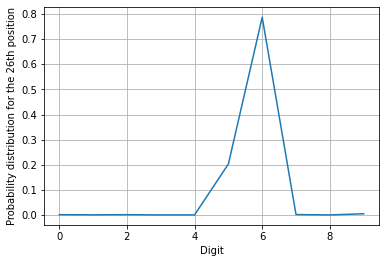

For the position 27
original digit is: tensor([7], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 8.06E-01
Digit: 1, Probability: 3.57E-04
Digit: 2, Probability: 7.47E-04
Digit: 3, Probability: 8.56E-05
Digit: 4, Probability: 2.20E-05
Digit: 5, Probability: 1.75E-03
Digit: 6, Probability: 1.63E-04
Digit: 7, Probability: 1.90E-01
Digit: 8, Probability: 2.32E-04
Digit: 9, Probability: 6.50E-04


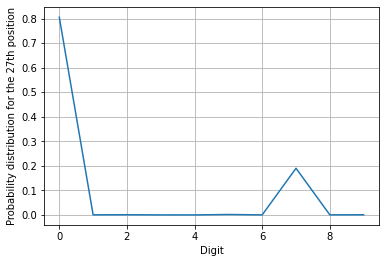

For the position 28
original digit is: tensor([9], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 1.04E-03
Digit: 1, Probability: 1.33E-03
Digit: 2, Probability: 2.22E-03
Digit: 3, Probability: 5.17E-04
Digit: 4, Probability: 7.24E-05
Digit: 5, Probability: 1.38E-03
Digit: 6, Probability: 3.06E-04
Digit: 7, Probability: 3.77E-04
Digit: 8, Probability: 1.63E-01
Digit: 9, Probability: 8.30E-01


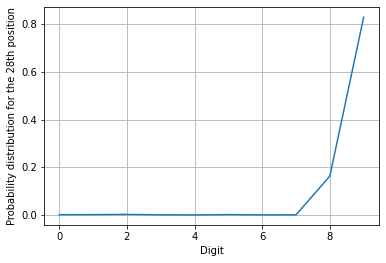

For the position 29
original digit is: tensor([4], device='cuda:0')
Model's probability distribution of digits for this position 
Digit: 0, Probability: 1.44E-01
Digit: 1, Probability: 1.21E-03
Digit: 2, Probability: 4.84E-04
Digit: 3, Probability: 2.27E-03
Digit: 4, Probability: 8.51E-01
Digit: 5, Probability: 1.96E-04
Digit: 6, Probability: 3.61E-04
Digit: 7, Probability: 2.19E-05
Digit: 8, Probability: 8.34E-06
Digit: 9, Probability: 3.10E-05


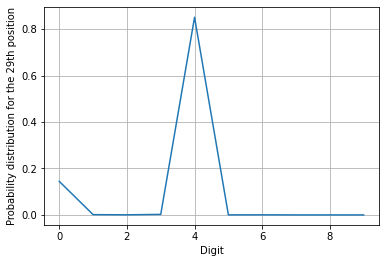

In [127]:
import random
pref_len = 30
        
sub = torch.utils.data.Subset(TEST_DATASET, [random.randint(0, len(TEST_DATASET))])
sub_loader = torch.utils.data.DataLoader(sub, batch_size=1)

model.eval()
ti = iter(sub_loader)

total = 0
total_correct = 0
dist = None
for td in ti:
    x, y = td
    x = x.to(DEVICE).swapdims(0, 1)
    y = y.to(DEVICE).swapdims(0, 1)
    dist, cache = model(x, model.get_empty_cache(x.shape[1]))

logits = dist.logits.detach().cpu()
all_prefs = []
most_probable_for_pos = []
for i in range(pref_len):
  print(f"For the position {i}")
  print(f'original digit is: {y[i]}')
  print("Model's probability distribution of digits for this position ")
  digit_dist = []
  for j in range(logits.shape[2]):
    exp = torch.exp(logits[i, 0, j])
    digit_dist.append(exp.detach())
    print(f"Digit: {j}, Probability: {exp:.2E}")
  most_probable_for_pos.append(most_probable_from_list(digit_dist))
  plot_list(digit_dist, f"Probability distribution for the {i}th position", "Digit")
  all_prefs.append(digit_dist)


In [128]:
for i in range(pref_len):
  print(f'{y[i]}, {most_probable_for_pos[i]}')

tensor([3], device='cuda:0'), (1, tensor(0.3235))
tensor([7], device='cuda:0'), (4, tensor(0.3373))
tensor([9], device='cuda:0'), (8, tensor(0.4005))
tensor([0], device='cuda:0'), (0, tensor(0.2709))
tensor([3], device='cuda:0'), (3, tensor(0.8294))
tensor([7], device='cuda:0'), (7, tensor(0.8186))
tensor([8], device='cuda:0'), (9, tensor(0.7604))
tensor([9], device='cuda:0'), (9, tensor(0.2429))
tensor([4], device='cuda:0'), (0, tensor(0.5922))
tensor([6], device='cuda:0'), (5, tensor(0.3326))
tensor([7], device='cuda:0'), (7, tensor(0.3286))
tensor([9], device='cuda:0'), (9, tensor(0.8045))
tensor([4], device='cuda:0'), (4, tensor(0.8452))
tensor([6], device='cuda:0'), (6, tensor(0.6942))
tensor([0], device='cuda:0'), (7, tensor(0.5703))
tensor([3], device='cuda:0'), (3, tensor(0.8510))
tensor([7], device='cuda:0'), (7, tensor(0.8543))
tensor([9], device='cuda:0'), (9, tensor(0.8044))
tensor([0], device='cuda:0'), (4, tensor(0.8407))
tensor([1], device='cuda:0'), (3, tensor(0.8523))


One may want to know how many elements of a sequence a model needs to see in order to learn the underlying pattern.
To check this write a function that given a model and a data set loader calculates for each position in the range $[0,\text{SEQ_LEN}]$ average model accuracy. Assume that we take the most probable answer.

In [54]:

def average_model_accuracy(model, test_loader, pref):
  model.eval()
  ti = iter(test_loader)

  total = 0
  total_correct = 0
  for td in ti:
      x, y = td
      x = x.to(DEVICE).swapdims(0, 1)[:pref]
      y = y.to(DEVICE).swapdims(0, 1)[:pref]
      dist, cache = model(x, model.get_empty_cache(x.shape[1]))

      logits = dist.logits.detach().cpu()

      model_ans = take_most_probable(dist)
      total_correct += (model_ans == y).sum().cpu().item()
      total += np.prod(y.shape)

  return total_correct/total

<ipython-input-18-fee9b59fdfa1>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(positional_encoding, dtype=torch.float,


Average accuracy for prefix 1: 0.278
Average accuracy for prefix 2: 0.2935
Average accuracy for prefix 3: 0.31766666666666665
Average accuracy for prefix 4: 0.345
Average accuracy for prefix 5: 0.3666
Average accuracy for prefix 6: 0.38433333333333336
Average accuracy for prefix 7: 0.4027142857142857
Average accuracy for prefix 8: 0.419625
Average accuracy for prefix 9: 0.43555555555555553
Average accuracy for prefix 10: 0.4529
Average accuracy for prefix 11: 0.4662727272727273
Average accuracy for prefix 12: 0.4806666666666667
Average accuracy for prefix 13: 0.4950769230769231
Average accuracy for prefix 14: 0.5075714285714286
Average accuracy for prefix 15: 0.5198
Average accuracy for prefix 16: 0.528875
Average accuracy for prefix 17: 0.5386470588235294
Average accuracy for prefix 18: 0.5481111111111111
Average accuracy for prefix 19: 0.5566315789473684
Average accuracy for prefix 20: 0.56605
Average accuracy for prefix 21: 0.5745238095238095
Average accuracy for prefix 22: 0.581909

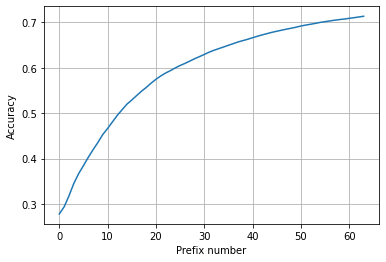

In [59]:
pref_avgs = []

for pref in range(1, SEQ_LEN+1):
  pref_avg = average_model_accuracy(model, TEST_LOADER, pref)
  pref_avgs.append(pref_avg)
  print(f'Average accuracy for prefix {pref}: {pref_avg}')

plot_list(pref_avgs, "Accuracy", "Prefix number")

As we expected, accuracy is increasing while increasing the length of the input to feed the model with. The biggest rise in the accuracy is up to 25th prefix  (where accuracy reaches 0.6). Afterwards, accuracy is growing slower, up to 0.71 for the 62th prefix.

# Additional experiments, text generation and visualizations 

## Experiments considering number of layers and positional encodings

In [46]:
# Number of layers in a small test that uses 15 epochs
for nl in range(1, 3*NUM_LAYERS // 2):
  model_test_nl = Decoder(vocab_size=VOCAB_SIZE, 
                  d_model=HIDDEN_DIM,
                  d_ff=HIDDEN_FF,
                  num_heads=NUM_HEADS,
                  d_head=HEAD_DIM,
                  num_layers=nl)

  model_test_nl.to(DEVICE)
  print(f"Experiment with {nl} layers.")
  train(model_test_nl, TRAIN_LOADER, TEST_LOADER, 15, 0)

Experiment with 1 layers.


<ipython-input-18-fee9b59fdfa1>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(positional_encoding, dtype=torch.float,


EPOCH 0 loss:2.2180131930339186 acc:0.2802
EPOCH 1 loss:2.1144119214408006 acc:0.3287
EPOCH 2 loss:2.00704991213883 acc:0.3442
EPOCH 3 loss:1.9621529413174978 acc:0.3525
EPOCH 4 loss:1.9348238751858096 acc:0.3589
EPOCH 5 loss:1.9144980801811702 acc:0.3635
EPOCH 6 loss:1.8981650117077404 acc:0.3678
EPOCH 7 loss:1.8848361154145832 acc:0.3702
EPOCH 8 loss:1.8735968447938751 acc:0.3727
EPOCH 9 loss:1.8625842076313646 acc:0.3747
EPOCH 10 loss:1.8523862633524062 acc:0.3762
EPOCH 11 loss:1.8428823072699052 acc:0.3773
EPOCH 12 loss:1.832844061187551 acc:0.3800
EPOCH 13 loss:1.823471846459787 acc:0.3820
EPOCH 14 loss:1.8136726089670687 acc:0.3835
Experiment with 2 layers.
EPOCH 0 loss:2.2292523203016836 acc:0.2814
EPOCH 1 loss:2.0973574209816848 acc:0.3307
EPOCH 2 loss:1.979255637036094 acc:0.3776
EPOCH 3 loss:1.7155689076532292 acc:0.5878
EPOCH 4 loss:1.202381497696985 acc:0.6803
EPOCH 5 loss:1.0008073449134827 acc:0.6978
EPOCH 6 loss:0.9413021033323263 acc:0.7041
EPOCH 7 loss:0.91140788793563

In [61]:
# Number of layers during a bigger test
for nl in range(2, 5):
  model_test_nl = Decoder(vocab_size=VOCAB_SIZE, 
                  d_model=HIDDEN_DIM,
                  d_ff=HIDDEN_FF,
                  num_heads=NUM_HEADS,
                  d_head=HEAD_DIM,
                  num_layers=nl)

  model_test_nl.to(DEVICE)
  print(f"Experiment with {nl} layers.")
  train(model_test_nl, TRAIN_LOADER, TEST_LOADER, 50, 0)

Experiment with 2 layers.


<ipython-input-18-fee9b59fdfa1>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(positional_encoding, dtype=torch.float,


EPOCH 0 loss:2.2189481167853633 acc:0.2828
EPOCH 1 loss:2.1005956085422373 acc:0.3305
EPOCH 2 loss:1.9839874807792375 acc:0.3761
EPOCH 3 loss:1.7238945176329794 acc:0.5544
EPOCH 4 loss:1.2050226459020301 acc:0.6746
EPOCH 5 loss:1.0176058585130716 acc:0.6946
EPOCH 6 loss:0.9538660026803801 acc:0.7043
EPOCH 7 loss:0.9179215106783034 acc:0.7075
EPOCH 8 loss:0.8944733874707282 acc:0.7108
EPOCH 9 loss:0.8793337488476234 acc:0.7129
EPOCH 10 loss:0.8667558031746104 acc:0.7141
EPOCH 11 loss:0.8587085234967968 acc:0.7146
EPOCH 12 loss:0.8526681299451031 acc:0.7153
EPOCH 13 loss:0.8462755227390724 acc:0.7152
EPOCH 14 loss:0.8398305864273747 acc:0.7156
EPOCH 15 loss:0.835378434839128 acc:0.7156
EPOCH 16 loss:0.830325835113284 acc:0.7156
EPOCH 17 loss:0.8239293837849098 acc:0.7155
EPOCH 18 loss:0.8186359684678572 acc:0.7165
EPOCH 19 loss:0.8141677553140665 acc:0.7166
EPOCH 20 loss:0.8093406256241135 acc:0.7170
EPOCH 21 loss:0.8042372253876698 acc:0.7171
EPOCH 22 loss:0.801920057852057 acc:0.7175
E

During the first test, I wanted to check out, which numbers can be the best option for our model, only in small training using 15 epochs. Then, I ran "normal" training for num_layers=[2, 3, 4]. The best accuracy is achieved for 2, acc.= 0.721 and loss=0.744. 

In [ ]:
#positional encoding
for pos in range(0, 64, 5):
  model_pos = Decoder(vocab_size=VOCAB_SIZE, 
                  d_model=HIDDEN_DIM,
                  d_ff=HIDDEN_FF,
                  num_heads=NUM_HEADS,
                  d_head=HEAD_DIM,
                  num_layers=4)

  model_pos.to(DEVICE)
  print(f"Experiment with offset {pos}.")
  train(model_pos, TRAIN_LOADER, TEST_LOADER, 15, pos)

## Text Generation

Use cache to perform efficient text generation. You should generate text token by token. You should consider two choice procedures:
* output the most probable token
* sample from the distribution returned by the model

There are two methods for generating next token probabilities:
* The inefficient method involves running the model with each prefix, predicting the next token, adding it to the prefix, and then running the whole model again. Note that this method may result in a 10% reduction in points.
* The efficient method involves storing (caching) the K and V vectors used in the Attention layer, so that you can pass a single token to get the next one, instead of processing the whole prefix again.

Next, test and compare two sampling methods: argmax (taking, as the next token, the most likely token) and sampling from a distribution returned by the model. Generate a few sentences with those methods. How quickly a model can spot a pattern?

In [111]:
BATCH_SIZE = 128
HIDDEN_DIM = 64
HIDDEN_FF = HIDDEN_DIM * 4
NUM_HEADS = 4
HEAD_DIM = HIDDEN_DIM // NUM_HEADS
NUM_LAYERS = 4
LR = 0.001
POSITIONAL = True

model_gen = Decoder(vocab_size=VOCAB_SIZE, 
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS)

model_gen.to(DEVICE)

Decoder(
  (embedding): Embedding(10, 64)
  (dec_layers): ModuleList(
    (0): DecoderLayer(
      (attention): MultiHeadAttention(
        (dropout): Dropout(p=0.1, inplace=False)
        (softmax): Softmax(dim=1)
        (query): Linear(in_features=64, out_features=64, bias=True)
        (key): Linear(in_features=64, out_features=64, bias=True)
        (value): Linear(in_features=64, out_features=64, bias=True)
      )
      (feedforward): FeedForward(
        (lin1): Linear(in_features=64, out_features=256, bias=True)
        (lin2): Linear(in_features=256, out_features=64, bias=True)
        (act): ReLU()
        (do): Dropout(p=0.1, inplace=False)
      )
      (layernorm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (layernorm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    )
    (1): DecoderLayer(
      (attention): MultiHeadAttention(
        (dropout): Dropout(p=0.1, inplace=False)
        (softmax): Softmax(dim=1)
        (query): Linear(in_feature

In [112]:
def gen_train(model, train_loader, test_loader, num_epoches, pref):
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)
    for epoch in range(num_epoches):
        model.train()
        ti = iter(train_loader)
        epoch_total_loss = 0.0
        num_iters = 0
        for td in ti:
            x, y = td
            x = x.to(DEVICE).swapdims(0, 1)[:pref]
            y = y.to(DEVICE).swapdims(0, 1)[:pref]
            optimizer.zero_grad()
            dist, cache = model(x, model.get_empty_cache(x.shape[1]), pref)

            loss = -dist.log_prob(y).mean()
            loss.backward()
            optimizer.step()

            num_iters += 1
            epoch_total_loss += loss.detach().cpu().item()

        acc = eval(model, test_loader)
        epoch_avg_loss = epoch_total_loss / num_iters
        print(f"EPOCH {epoch} loss:{epoch_avg_loss} acc:{acc:.4f}")

In [125]:
def generate(model_gen):
  gen_most = [0]
  gen_sample = [0]
  for pref in range(1, SEQ_LEN):
    print(f'Prefix: {pref}')
    gen_train(model_gen, TRAIN_LOADER, TEST_LOADER, 10, pref)
    tensor_gen = torch.tensor(gen_most).unsqueeze(-1).to(DEVICE)
    dist_most, cache_most = model_gen(tensor_gen, model_gen.get_empty_cache(tensor_gen.shape[1]))
    most_probable = take_most_probable(dist_most)
    tensor_gen = torch.tensor(gen_sample).unsqueeze(-1).to(DEVICE)
    dist_sample, cache_sample = model_gen(tensor_gen, model_gen.get_empty_cache(tensor_gen.shape[1]))
    sample = take_sample(dist_sample)
    print(f'Samples: {most_probable}, {sample}')
    gen_sample.append(sample[-1].item())
    gen_most.append(most_probable[-1].item())
    print(f'Current sequences: using take_most_probable: {gen_most}, and take_sample: {gen_sample}')
    #return most_probable, sample


In [126]:
generate(model_gen)

Prefix: 1


<ipython-input-104-fee9b59fdfa1>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(positional_encoding, dtype=torch.float,


EPOCH 0 loss:2.2285856144337712 acc:0.1484
EPOCH 1 loss:2.2169408375703834 acc:0.1513
EPOCH 2 loss:2.213741924189314 acc:0.1316
EPOCH 3 loss:2.206892408902132 acc:0.1334
EPOCH 4 loss:2.201909786538233 acc:0.1187
EPOCH 5 loss:2.201981152160258 acc:0.1096
EPOCH 6 loss:2.200541650192647 acc:0.1134
EPOCH 7 loss:2.202954575985293 acc:0.1274
EPOCH 8 loss:2.1998470221893696 acc:0.1004
EPOCH 9 loss:2.201887348030187 acc:0.0941
Samples: tensor([[1]], device='cuda:0'), tensor([[3]], device='cuda:0')
[0, 3] [0, 1]
Prefix: 2
EPOCH 0 loss:2.213282781311228 acc:0.1387
EPOCH 1 loss:2.187628945217857 acc:0.1486
EPOCH 2 loss:2.177654106405717 acc:0.1640
EPOCH 3 loss:2.176259674603426 acc:0.1608
EPOCH 4 loss:2.179124983051155 acc:0.1627
EPOCH 5 loss:2.1738760260087027 acc:0.1523
EPOCH 6 loss:2.1783919938002962 acc:0.1525
EPOCH 7 loss:2.184752530689481 acc:0.1337
EPOCH 8 loss:2.1771021372155297 acc:0.1430
EPOCH 9 loss:2.1674096735217905 acc:0.1577
Samples: tensor([[1],
        [2]], device='cuda:0'), ten

KeyboardInterrupt: ignored

## Attention visualizations (optional)